In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
color_pal = sns.color_palette()

In [231]:
df = pd.read_csv('EIA.csv', dtype_backend='pyarrow')

In [ ]:
pd.read_sql()

In [232]:
df.head(5)

,period,respondent,respondent-name,type,type-name,value,value-units
0,2015-07-01T08,EPE,El Paso Electric Company,NG,Net generation,447.0,megawatthours
1,2015-07-01T09,EPE,El Paso Electric Company,D,Demand,856.0,megawatthours
2,2015-07-01T09,EPE,El Paso Electric Company,NG,Net generation,356.0,megawatthours
3,2015-07-01T10,EPE,El Paso Electric Company,D,Demand,839.0,megawatthours
4,2015-07-01T10,EPE,El Paso Electric Company,NG,Net generation,352.0,megawatthours


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686975 entries, 0 to 686974
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   period           686975 non-null  string[pyarrow]
 1   respondent       686975 non-null  string[pyarrow]
 2   respondent-name  686975 non-null  string[pyarrow]
 3   type             686975 non-null  string[pyarrow]
 4   type-name        686975 non-null  string[pyarrow]
 5   value            686150 non-null  double[pyarrow]
 6   value-units      686975 non-null  string[pyarrow]
dtypes: double[pyarrow](1), string[pyarrow](6)
memory usage: 62.4 MB


In [234]:
df['period'] = pd.to_datetime(df.period)

In [235]:
df.shape

(686975, 7)

In [236]:
df.isna().sum()

period               0
respondent           0
respondent-name      0
type                 0
type-name            0
value              825
value-units          0
dtype: int64

In [237]:
df['value'] = df['value'].bfill()

C:\Users\shane\AppData\Local\Temp\ipykernel_34068\2471592446.py:1: PerformanceWarning: Falling back on a non-pyarrow code path which may decrease performance.
  df['value'] = df['value'].bfill()


In [238]:
df.index =df.period

In [239]:
df = df[['respondent-name','type-name','value','value-units']].copy()

In [240]:
df.rename(columns={'respondent-name':'respondent','type-name':'type'}, inplace=True)

In [241]:
def create_features(df):
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Day'] = df.index.dayofweek
    df['Hour'] = df.index.hour
    df['DayofYear'] = df.index.dayofyear
    df['Quarter'] = df.index.quarter


In [242]:
create_features(df)

In [243]:
df.head()

,respondent,type,value,value-units,Year,Month,Day,Hour,DayofYear,Quarter
period,,,,,,,,,,
2015-07-01 08:00:00,El Paso Electric Company,Net generation,447.0,megawatthours,2015,7,2,8,182,3
2015-07-01 09:00:00,El Paso Electric Company,Demand,856.0,megawatthours,2015,7,2,9,182,3
2015-07-01 09:00:00,El Paso Electric Company,Net generation,356.0,megawatthours,2015,7,2,9,182,3
2015-07-01 10:00:00,El Paso Electric Company,Demand,839.0,megawatthours,2015,7,2,10,182,3
2015-07-01 10:00:00,El Paso Electric Company,Net generation,352.0,megawatthours,2015,7,2,10,182,3


In [244]:
respondents =['El Paso Electric Company' ,
              'New York',
              'Seattle City Light',
              'Tampa Electric Company' ,
               'Los Angeles Department of Water and Power',]

In [245]:
generation = df.query(f"type =='Net generation'")

In [246]:
generation.shape

(343485, 10)

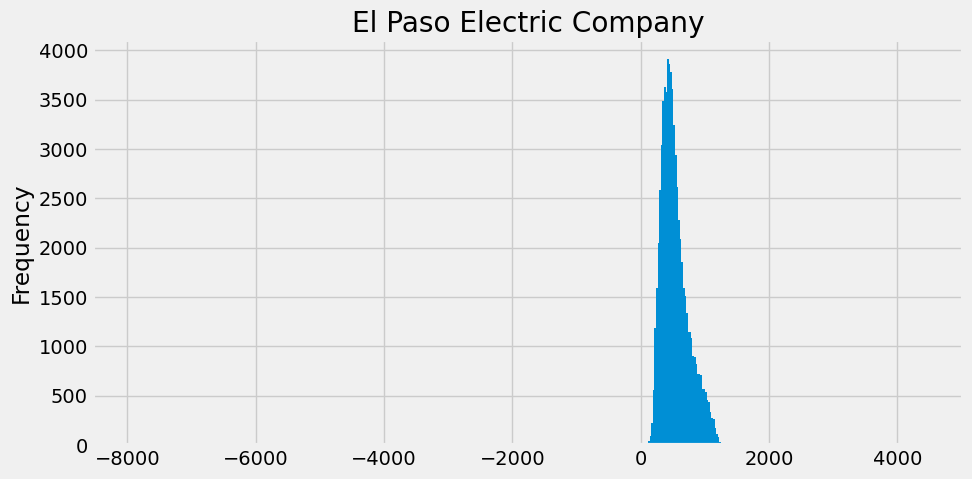

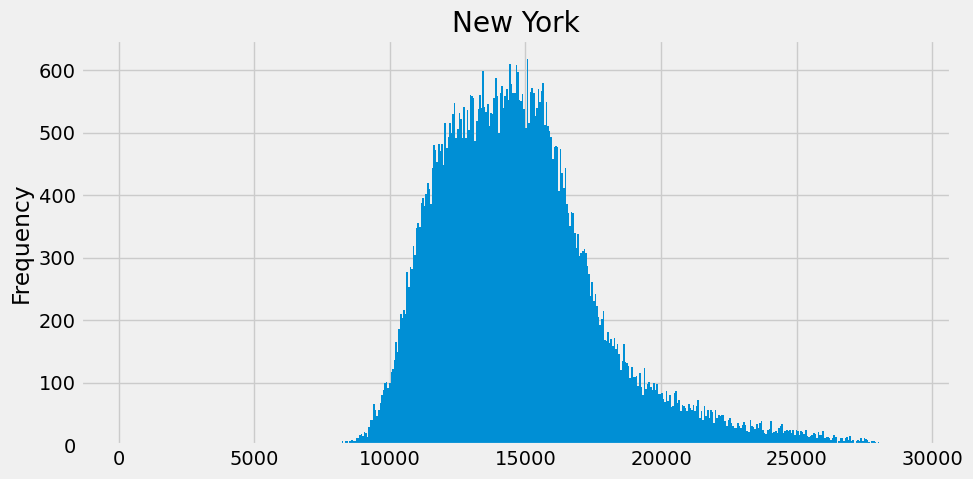

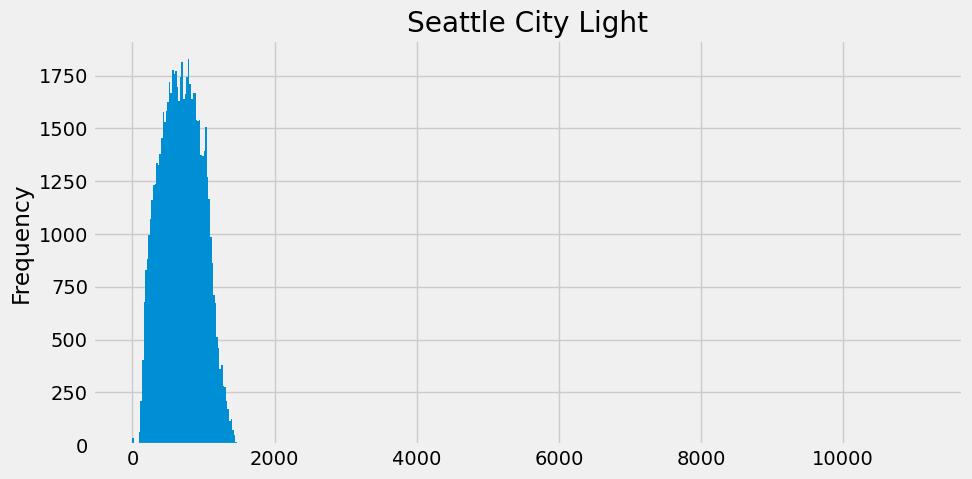

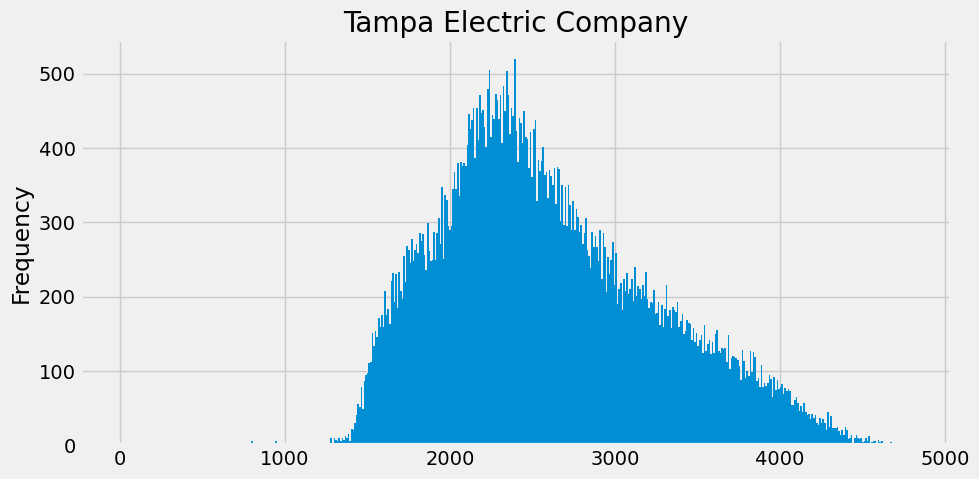

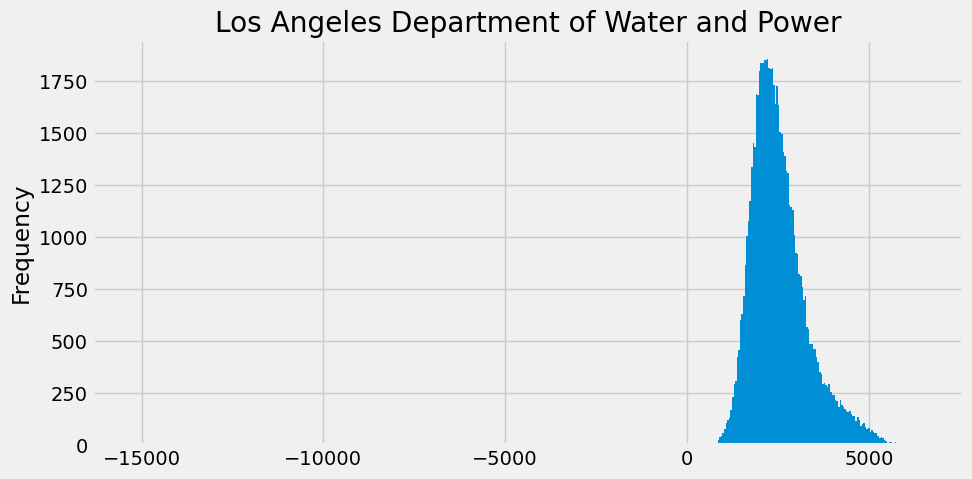

In [247]:
for res in respondents:
    fig, ax = plt.subplots(figsize=(10,5))
    ax = generation.query(f"respondent == '{res}' ")['value'].plot(kind='hist', bins =500, title =f'{res}')

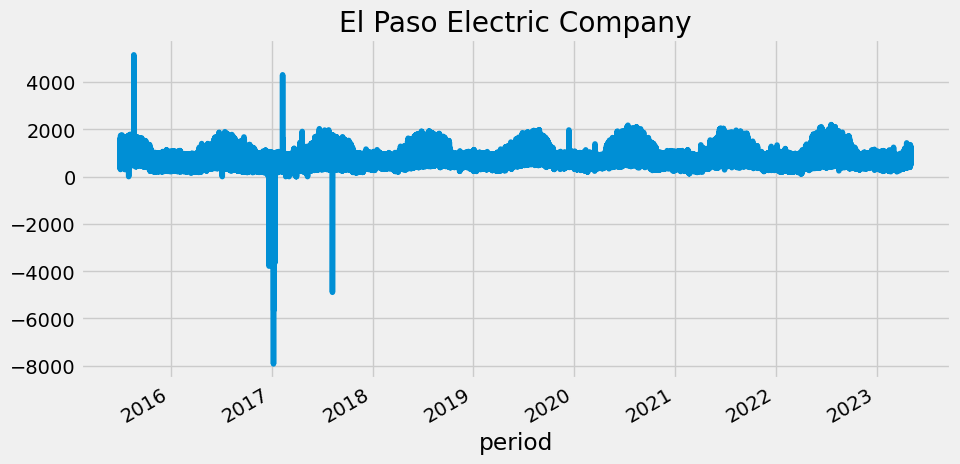

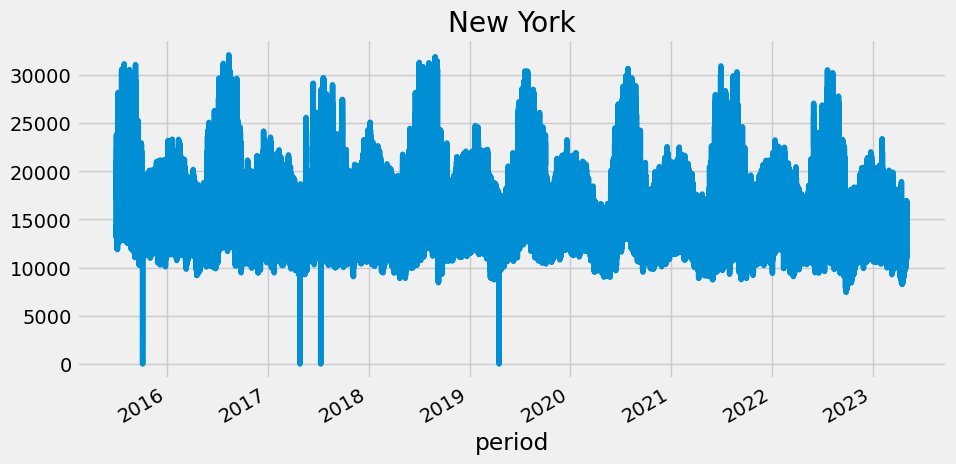

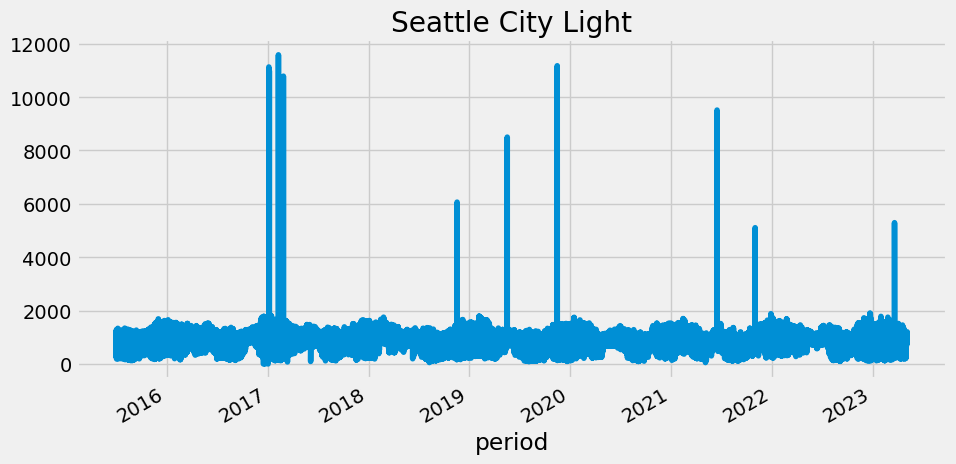

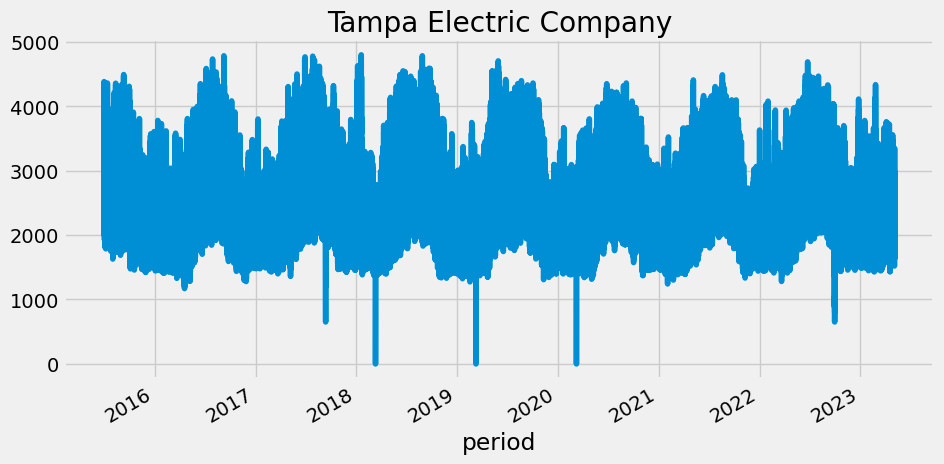

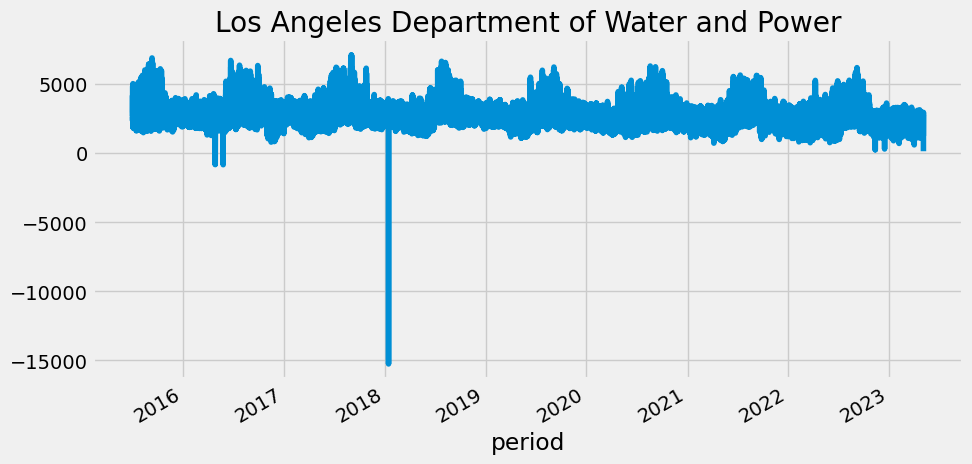

In [248]:
for res in respondents:
    fig, ax = plt.subplots(figsize=(10,5))
    ax = df.query(f"respondent == '{res}' ")['value'].plot(title =f'{res}')

In [249]:
generation_NY = generation.query("respondent== 'New York' and value > 7500 ")
generation_Tampa = generation.query("respondent == 'Tampa Electric Company' and value >1100 ")
generation_Seattle = generation.query("respondent == 'Seattle City Light' and value >120 and value <2000")
generation_LA = generation.query("respondent ==  'Los Angeles Department of Water and Power' and value >900")
generation_El_Paso = generation.query("respondent ==  'El Paso Electric Company' and value >120 and value < 2000")

C:\Users\shane\AppData\Local\Temp\ipykernel_34068\1608995417.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  generation_NY = generation.query("respondent== 'New York' and value > 7500 ")
C:\Users\shane\AppData\Local\Temp\ipykernel_34068\1608995417.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  generation_Tampa = generation.query("respondent == 'Tampa Electric Company' and value >1100 ")
C:\Users\shane\AppData\Local\Temp\ipykernel_34068\1608995417.py:3: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  generation_Seattle = generation.query("respondent == 'Seattle City Light' and value >120 and value <2000")
C:\Users\shane\AppData\Local\Temp\ipykernel_34068\1608995417.py:4: Ru

In [252]:
# generation_LA.to_csv('data/Clean_Data/generation_LA.csv',index=False)
# generation_NY.to_csv('data/Clean_Data/generation_NY.csv',index=False)
# generation_Seattle.to_csv('data/Clean_Data/generation_Seattle.csv',index=False)
# generation_El_Paso.to_csv('data/Clean_Data/generation_El_Paso.csv', index=False)
# generation_Tampa.to_csv('data/Clean_Data/generation_Tampa.csv', index=False)

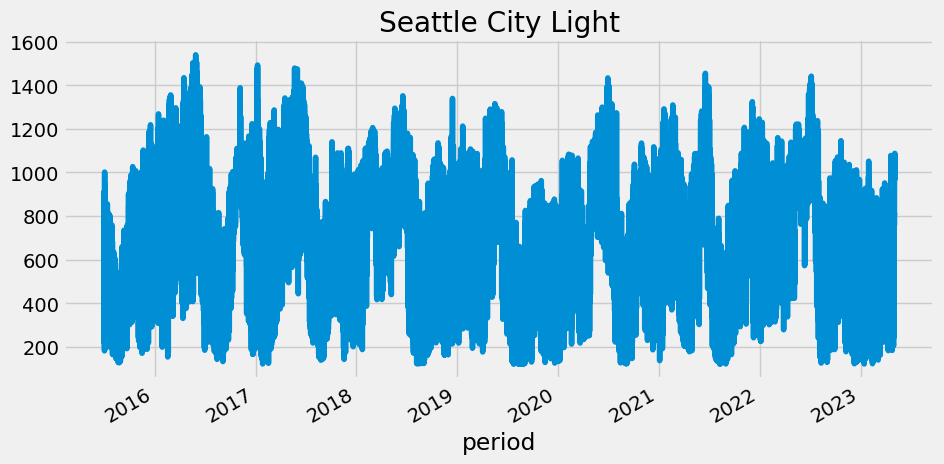

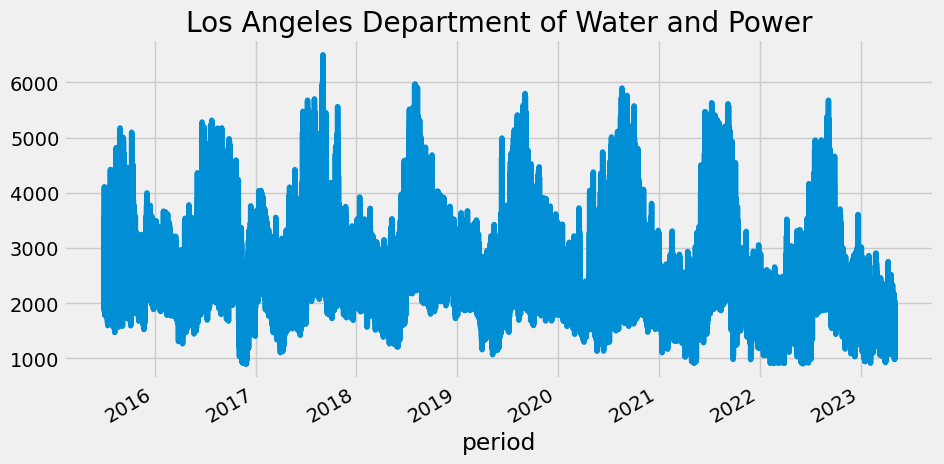

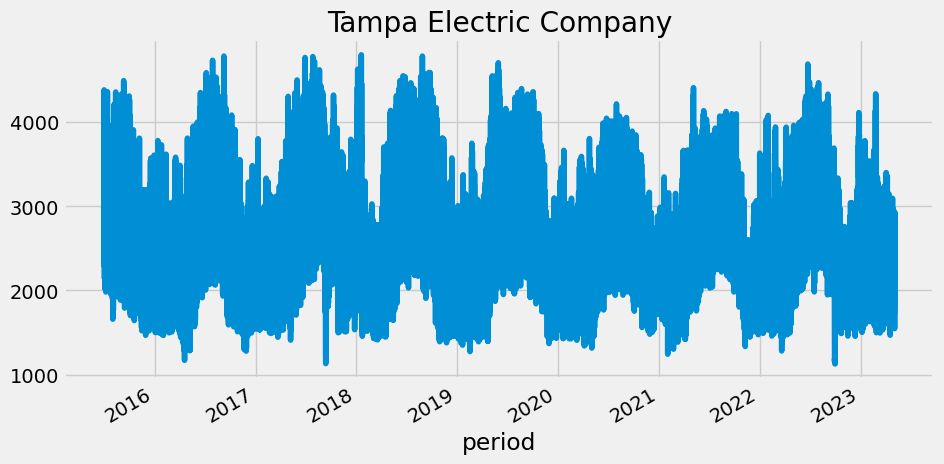

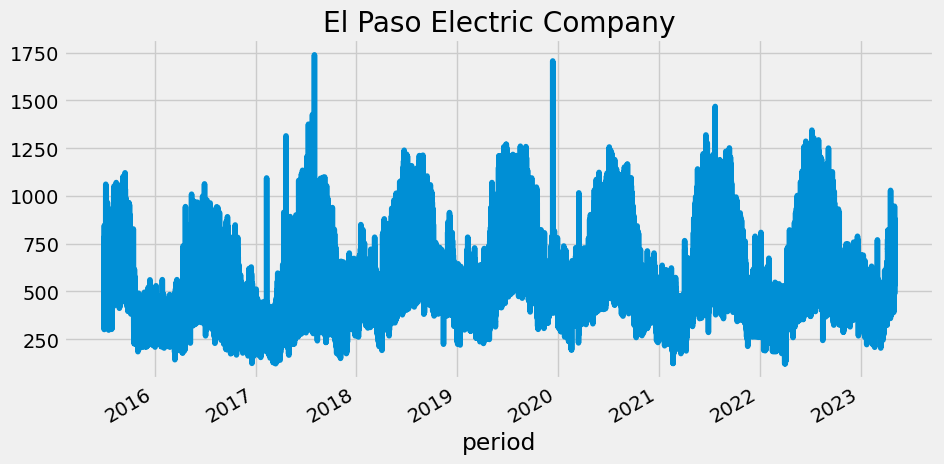

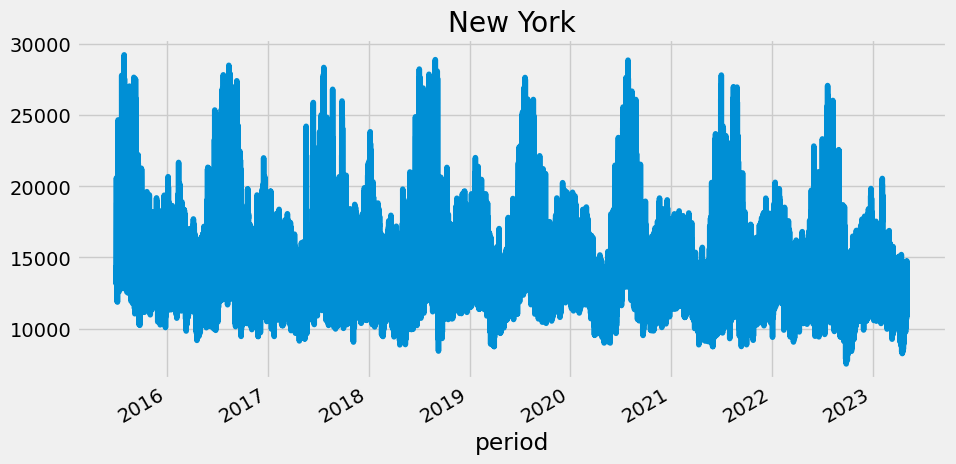

In [250]:
gen = [generation_Seattle,generation_LA,generation_Tampa,generation_El_Paso,generation_NY]
for i in gen:
    fig, ax = plt.subplots(figsize=(10,5))
    ax = i['value'].plot(title =i['respondent'][0])

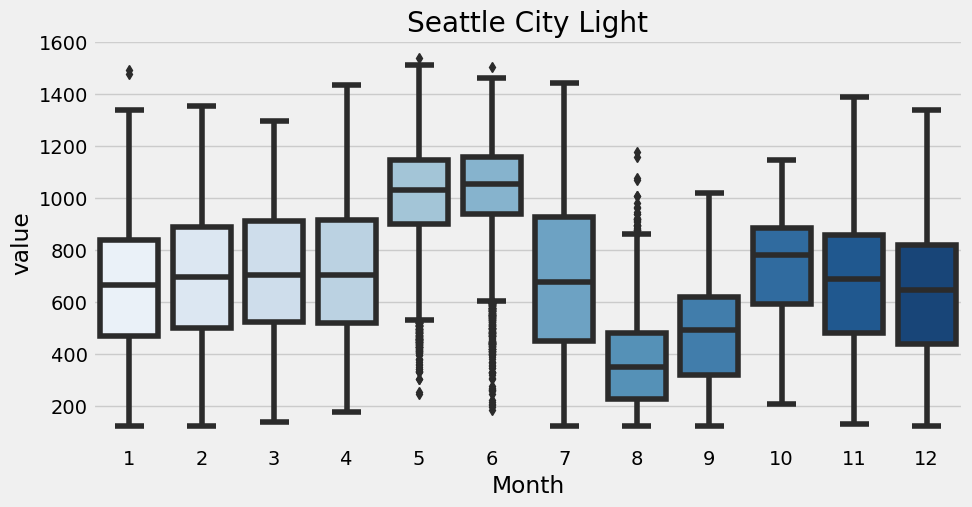

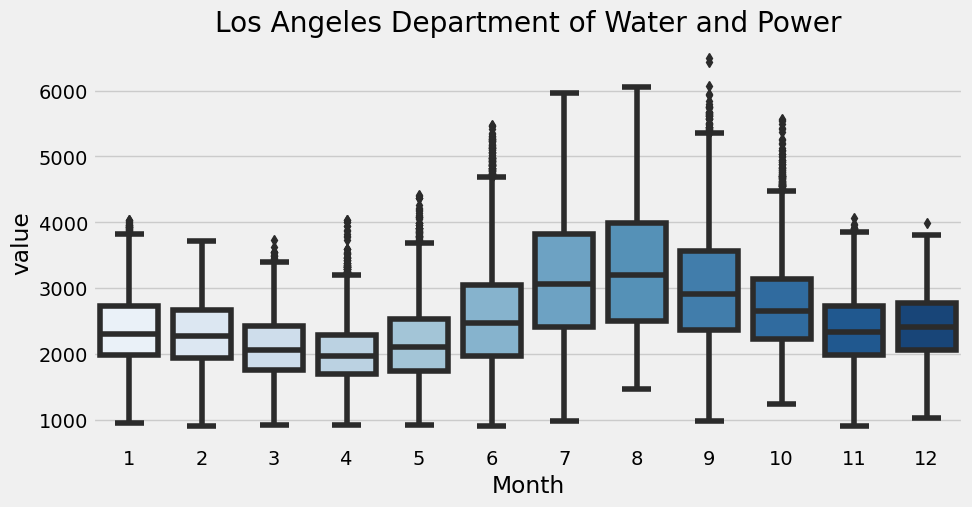

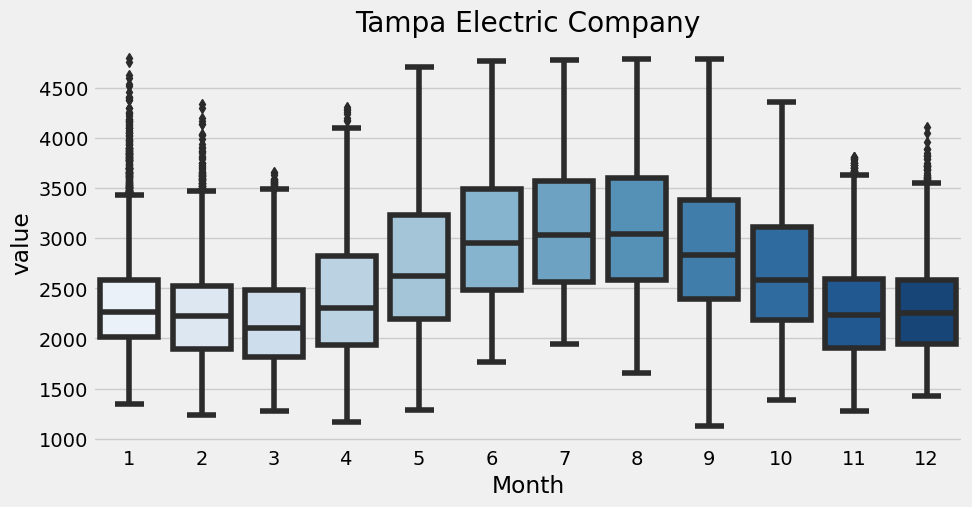

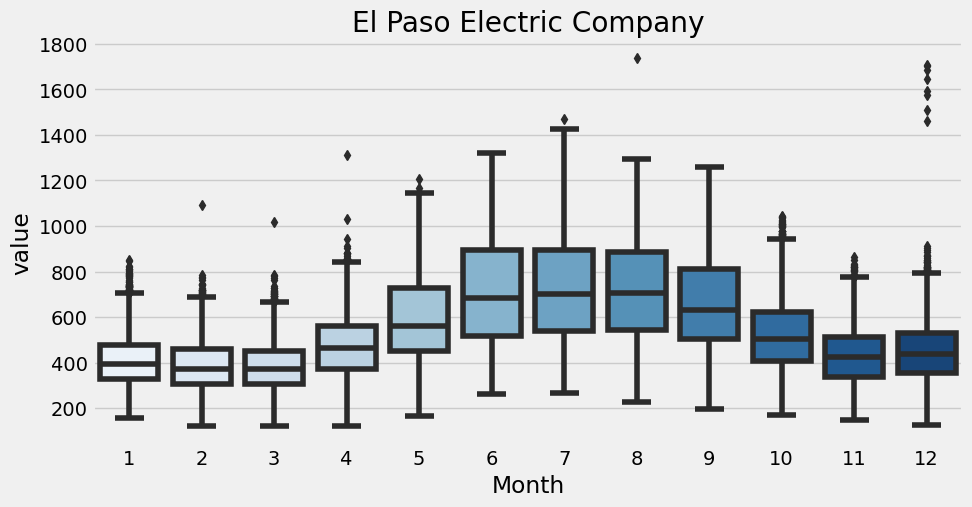

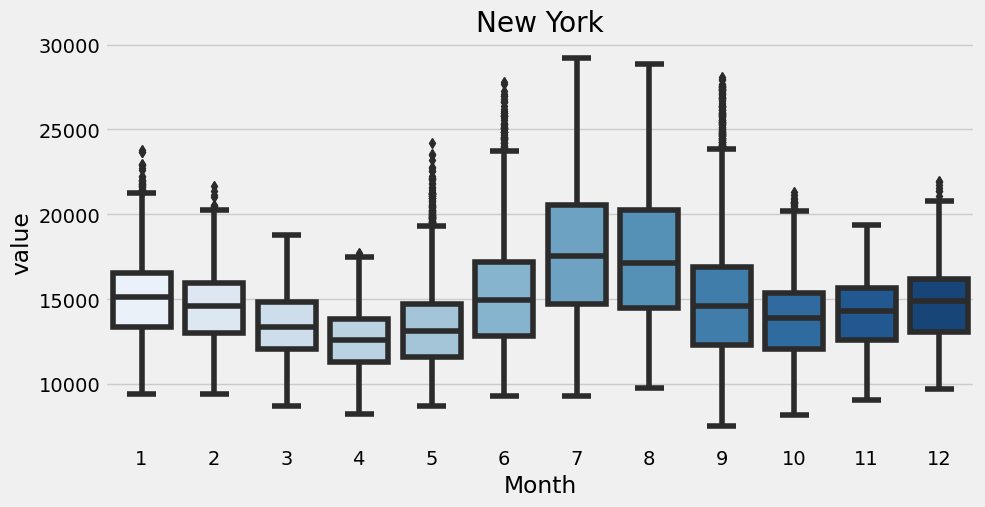

In [257]:
for i in gen:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.boxplot(data=i,x='Month', y='value', palette='Blues')
    ax.set_title(i['respondent'][0])